<a href="https://colab.research.google.com/github/Joelzr01/Proyecto-de-Aprendizaje-Autom-tico-para-la-detecci-n-de-C-ncer-y-Diabetes/blob/main/Deteccion_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logro B : Reconocer diferentes tipos de clasificadores y su aplicación.

**Grupo 2, Stalin Joel**


Importar bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargar los datos

In [ ]:
det_can=pd.read_csv('drive/My Drive/Colab Notebooks/Datasets/deteccionCancer.csv')
det_can

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
det_can.head()   #se muestran los 5 primeros registros

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
det_can.count()   # conocer la cantidad de registros que hay en cada columna

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
Unnamed:

In [ ]:
det_can.isnull().sum()  #verificar si no existen datos nulos

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Se elimina la columna `Id` de nuestro conjunto de datos, ya que no es necesaria para realizar EDA (Análisis exploratorio de datos) y la columna `unnamed: 32` ya que tiene datos vacios

In [ ]:
det_can.drop(columns = ['id','Unnamed: 32'], axis = 1 , inplace = True)  # ellimina las dos columna que para el EDA no nos sirve
det_can

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Reemplaza dentro de la columna de diagnostico la M de Maligno a 0 y la B Benigno en 1

In [ ]:
det_can['diagnosis'] = det_can['diagnosis'].replace({'M': 0, 'B': 1})


En la columna diagnosticos se reemplazo los datos para poderlo usarlos en el entrenamiento

In [ ]:
count_diagnosis = det_can['diagnosis'].value_counts()   # contamos la cantidad de diagnosticos malignos y benignos que existen
print(count_diagnosis)


1    357
0    212
Name: diagnosis, dtype: int64


# Basico EDA

La variable dependiente diagnosis se divide en 2, 0 (maligno) y 1 (benigno), por lo visto hay mas datos de personas con 1 es decir con resultados benigno

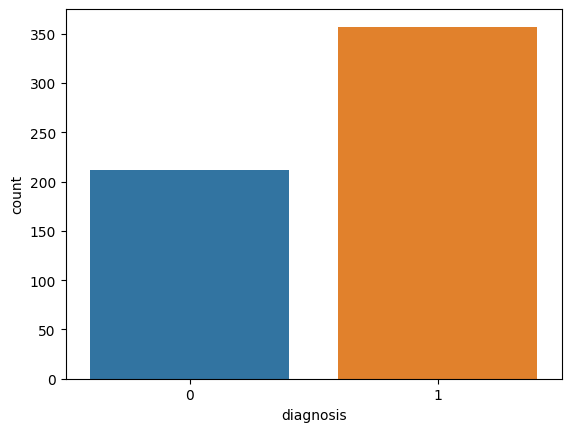

In [ ]:
sns.countplot(x='diagnosis',data=det_can)
plt.show()

In [ ]:
det_can.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
Diagnosis = det_can['diagnosis']   #Crea una variable llamada Diagnosis que almacena la columna 'diagnosis'
data = det_can.iloc[:, 1:31]  # Seleccione las columnas 2 a 31 inclusive
data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Stratification  (Estratificación):
Cuando dividimos el conjunto de datos en subconjuntos de datos para train y test, la división es completamente aleatoria. Por lo tanto, las instancias de cada etiqueta de clase o resultado en el train o en los conjuntos de datos de prueba son aleatorias.

# Dividir el data set en subconjunto para entrenamiento y test

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(det_can, test_size=0.25, random_state=0, stratify=det_can['diagnosis'])
train_X = train.iloc[:, 1:31]  # Select columns 2 to 30 (inclusive) for training features
test_X = test.iloc[:, 1:31]  # Select columns 2 to 30 (inclusive) for testing features

train_Y = train['diagnosis']  # Training labels
test_Y = test['diagnosis']  # Testing labels


In [ ]:
det_can.shape   # cantidad de datos iniciales

(569, 31)

In [ ]:
train.shape     # cantidad de datos de entrenamiento 75%

(426, 31)

In [ ]:
test.shape    # cantidad de datos de prueba 25%

(143, 31)

In [ ]:
train_X.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
74,12.310,16.52,79.19,470.9,0.09172,0.06829,0.033720,0.022720,0.1720,0.05914,...,14.110,23.21,89.71,611.1,0.1176,0.1843,0.17030,0.08660,0.2618,0.07609
201,17.540,19.32,115.10,951.6,0.08968,0.11980,0.103600,0.074880,0.1506,0.05491,...,20.420,25.84,139.50,1239.0,0.1381,0.3420,0.35080,0.19390,0.2928,0.07867
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.022970,0.017800,0.1482,0.06600,...,11.060,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842
151,8.219,20.70,53.27,203.9,0.09405,0.13050,0.132100,0.021680,0.2222,0.08261,...,9.092,29.72,58.08,249.8,0.1630,0.4310,0.53810,0.07879,0.3322,0.14860
306,13.200,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.410,20.45,92.00,636.9,0.1128,0.1346,0.01120,0.02500,0.2651,0.08385


In [ ]:
train_Y.head()

74     1
201    0
303    1
151    1
306    1
Name: diagnosis, dtype: int64

# Escalado de variables

Es importante en muchos algoritmos de aprendizaje automático para garantizar que todas las características tendrán una escala similar

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
train_X = sc_X.fit_transform(train_X)
test_X = sc_X.transform(test_X)

Sirve para el KNN en la grafica observar en que numero hay mejores resultados

In [ ]:
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, KFold
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate

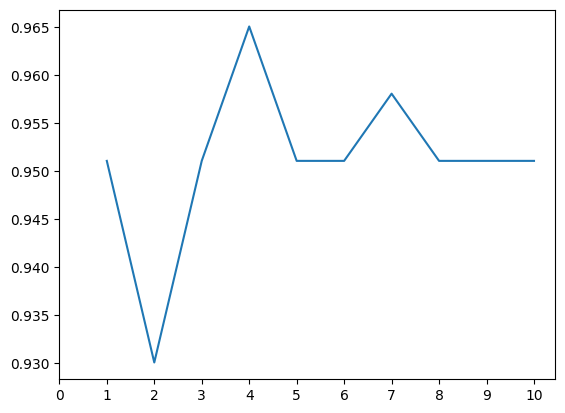

Accuracies for different values of n are: [0.95104895 0.93006993 0.95104895 0.96503497 0.95104895 0.95104895
 0.95804196 0.95104895 0.95104895 0.95104895]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',a.values)

In [ ]:
#funcion para evaluar metricas
def evaluacion(y_true, y_pred, metricas):
  res = {}
  for nombre, funcion in metricas.items():
    res[nombre] = funcion(y_true, y_pred)
    # res[nombre] = np.round(funcion(y_true, y_pred),4)
  return res

#Se crea un diccionario con los algoritmos a evaluar
algoritmos = {
              'Logistic Regression': LogisticRegression(random_state=42),
              'Descition Tree': DecisionTreeClassifier(criterion='entropy', random_state=42),
              'SVM': SVC(kernel = "rbf", C=10, random_state=42, probability=True),
              'Random Forest': RandomForestClassifier(n_estimators = 100, criterion = "entropy", random_state = 42),
              'KNN': KNeighborsClassifier(n_neighbors = 4, metric = "minkowski", p = 2),
              'Naive Bayes': GaussianNB(),
              }


#funcion para evaluar metricas
def evaluacion(y_true, y_pred, metricas):
    res = {}
    for nombre, funcion in metricas.items():
        res[nombre] = np.round(funcion(y_true, y_pred),4)
    return res

k=4

metricas = {
  'ACC':    #lambda y_true, y_pred:
           metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred, average='macro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred, average='macro'),
  'ROC':    lambda y_true, y_pred:
            metrics.roc_auc_score(y_true, y_pred, average='macro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='macro'),
  'MSE':    lambda y_true, y_pred:
            metrics.mean_squared_error(y_true, y_pred),
  'MAE':    lambda y_true, y_pred:
            metrics.mean_absolute_error(y_true, y_pred)
}

y_pred = {}
headers = ['METRICS']
ACC,PREC,RECALL,F1,ROC,MSE,MAE = ['ACCURACY'],['PRECISION'],['RECALL'],['F1'],['ROC'],['MSE'],['MAE']

for nombre, alg in algoritmos.items():
    y_pred[nombre] = cross_val_predict(alg, train_X, train_Y, cv=KFold(n_splits=k, shuffle=True, random_state=42))
    results = evaluacion(train_Y, y_pred[nombre], metricas)
    headers.append(nombre)
    ACC.append(results['ACC'])
    PREC.append(results['PREC'])
    RECALL.append(results['RECALL'])
    F1.append(results['F1'])
    ROC.append(results['ROC'])
    MSE.append(results['MSE'])
    MAE.append(results['MAE'])

my_data = [tuple(ACC), tuple(PREC), tuple(RECALL), tuple(F1), tuple(ROC), tuple(MSE), tuple(MAE)]
print(tabulate(my_data, headers=headers))


METRICS      Logistic Regression    Descition Tree     SVM    Random Forest     KNN    Naive Bayes
---------  ---------------------  ----------------  ------  ---------------  ------  -------------
ACCURACY                  0.9742            0.9319  0.9765           0.9507  0.9671         0.9366
PRECISION                 0.9756            0.9298  0.9774           0.9501  0.966          0.9338
RECALL                    0.9692            0.9241  0.9724           0.9441  0.9636         0.9304
F1                        0.9722            0.9268  0.9748           0.947   0.9648         0.932
ROC                       0.9692            0.9241  0.9724           0.9441  0.9636         0.9304
MSE                       0.0258            0.0681  0.0235           0.0493  0.0329         0.0634
MAE                       0.0258            0.0681  0.0235           0.0493  0.0329         0.0634


# Comparacion de los acurracy de **ENTRENAMIENTO**

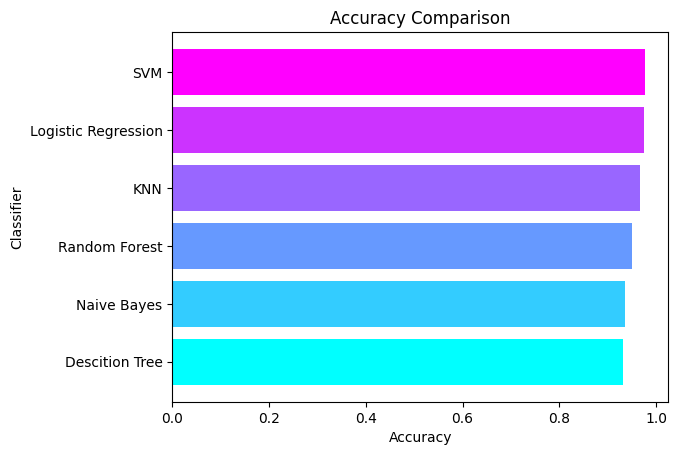

El clasificador con el Accuracy más alto es: SVM
El valor del máximo Accuracy es: 0.9765


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classifiers = headers[1:]  # Utilizamos los nombres de los clasificadores almacenados en 'headers'
accuracy_values = ACC[1:]  # Utilizamos los valores de accuracy almacenados en 'ACC'

# Ordenar las clasificaciones y los valores de Accuracy en función del Accuracy descendente
sorted_indices = np.argsort(accuracy_values)[::1]
classifiers_sorted = [classifiers[i] for i in sorted_indices]
accuracy_values_sorted = [accuracy_values[i] for i in sorted_indices]

# Configurar posición de las barras
position = np.arange(len(classifiers_sorted))

# Crear un mapa de colores gradual utilizando una escala de color predefinida
cmap = plt.cm.get_cmap('cool')  # Puedes cambiar el nombre de la escala de color según tus preferencias

# Crear gráfico de barras horizontal con colores graduales
plt.barh(position, accuracy_values_sorted, align='center', color=cmap(np.linspace(0, 1, len(classifiers_sorted))))

# Etiquetar las barras con los nombres de las clasificaciones
plt.yticks(position, classifiers_sorted)

plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')

plt.show()

# Encontrar el clasificador con el Accuracy más alto
max_accuracy_classifier = classifiers_sorted[-1]
print("El clasificador con el Accuracy más alto es:", max_accuracy_classifier)

max_accuracy = accuracy_values_sorted[-1]
print("El valor del máximo Accuracy es:", max_accuracy)

En el entrenamiento el algoritmo SVM fue el mejor con un 0.9765 y el que le sigue en el Logistic Regression con el 0.9742

# Evaluar los Algoritmos con el conjunto de TEST

In [ ]:
headers = ['METRICS']
ACC,PREC,RECALL,F1,ROC,MSE,MAE = ['ACCURACY'],['PRECISION'],['RECALL'],['F1'],['ROC'],['MSE'],['MAE']
for nombre, alg in algoritmos.items():
    y_pred = alg.fit(train_X, train_Y).predict(test_X)
    results = evaluacion(test_Y, y_pred, metricas)
    headers.append(nombre)
    ACC.append(results['ACC'])
    PREC.append(results['PREC'])
    RECALL.append(results['RECALL'])
    F1.append(results['F1'])
    ROC.append(results['ROC'])
    MSE.append(results['MSE'])
    MAE.append(results['MAE'])

my_data = [tuple(ACC), tuple(PREC), tuple(RECALL), tuple(F1), tuple(ROC), tuple(MSE), tuple(MAE)]
print(tabulate(my_data, headers=headers))

METRICS      Logistic Regression    Descition Tree     SVM    Random Forest     KNN    Naive Bayes
---------  ---------------------  ----------------  ------  ---------------  ------  -------------
ACCURACY                   0.958            0.9371  0.951            0.951   0.965          0.9091
PRECISION                  0.955            0.9312  0.9492           0.9492  0.9685         0.8998
RECALL                     0.955            0.9345  0.9456           0.9456  0.9567         0.9084
F1                         0.955            0.9328  0.9473           0.9473  0.9621         0.9036
ROC                        0.955            0.9345  0.9456           0.9456  0.9567         0.9084
MSE                        0.042            0.0629  0.049            0.049   0.035          0.0909
MAE                        0.042            0.0629  0.049            0.049   0.035          0.0909


# Comparacion de los acurracy de **TEST**

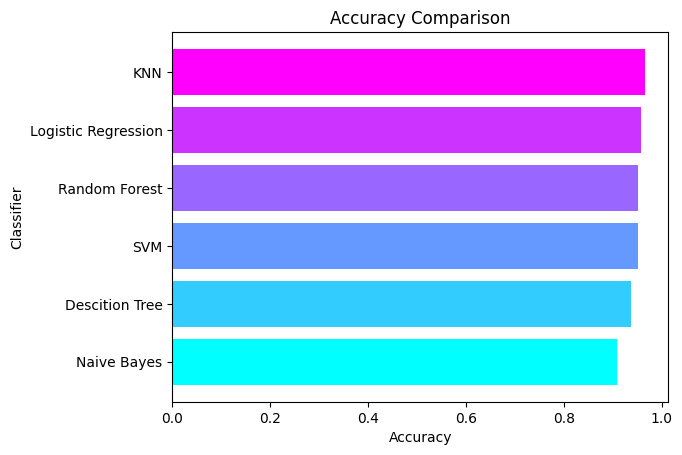

El clasificador con el Accuracy más alto es: KNN
El valor del máximo Accuracy es: 0.965


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classifiers = headers[1:]  # Utilizamos los nombres de los clasificadores almacenados en 'headers'
accuracy_values = ACC[1:]  # Utilizamos los valores de accuracy almacenados en 'ACC'

# Ordenar las clasificaciones y los valores de Accuracy en función del Accuracy descendente
sorted_indices = np.argsort(accuracy_values)[::1]
classifiers_sorted = [classifiers[i] for i in sorted_indices]
accuracy_values_sorted = [accuracy_values[i] for i in sorted_indices]

# Configurar posición de las barras
position = np.arange(len(classifiers_sorted))

# Crear un mapa de colores gradual utilizando una escala de color predefinida
cmap = plt.cm.get_cmap('cool')  # Puedes cambiar el nombre de la escala de color según tus preferencias

# Crear gráfico de barras horizontal con colores graduales
plt.barh(position, accuracy_values_sorted, align='center', color=cmap(np.linspace(0, 1, len(classifiers_sorted))))

# Etiquetar las barras con los nombres de las clasificaciones
plt.yticks(position, classifiers_sorted)

plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')

plt.show()

# Encontrar el clasificador con el Accuracy más alto
max_accuracy_classifier = classifiers_sorted[-1]
print("El clasificador con el Accuracy más alto es:", max_accuracy_classifier)

max_accuracy = accuracy_values_sorted[-1]
print("El valor del máximo Accuracy es:", max_accuracy)


En el test el mejor algoritmo fue KNN con un 0.965 y el que le sigue es el Logistic Regression con un 0.958

# Elaborar una matriz de confusión

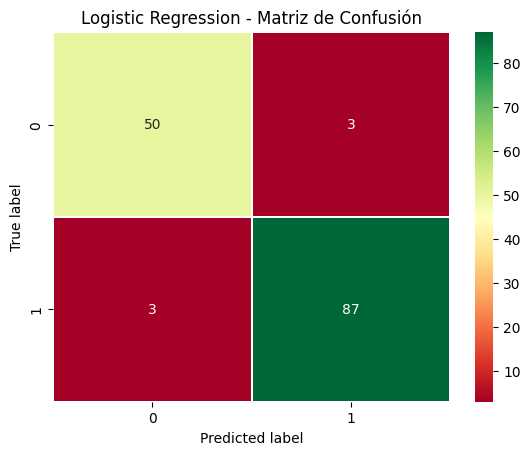

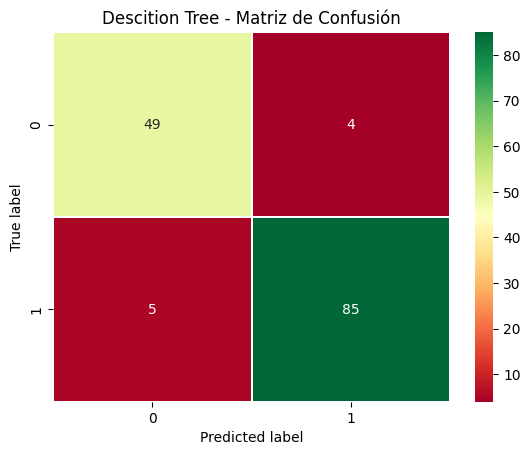

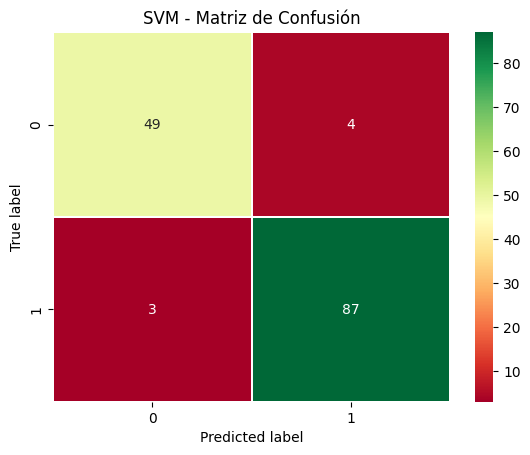

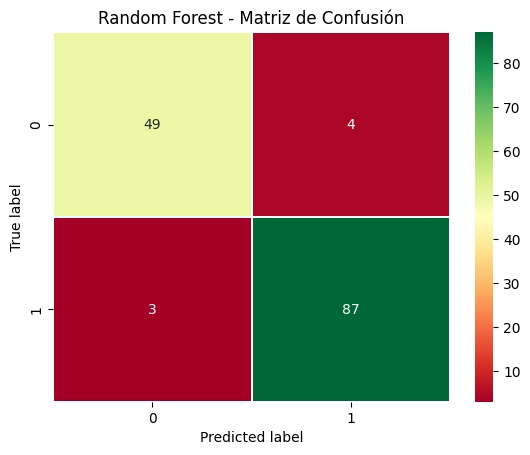

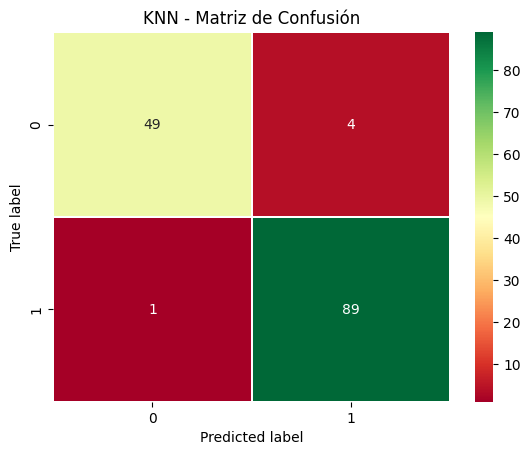

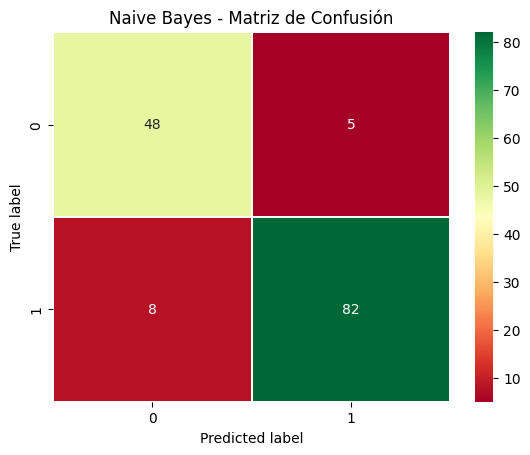

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

for nombre, alg in algoritmos.items():
    y_pred = alg.fit(train_X, train_Y).predict(test_X)
    cm = confusion_matrix(test_Y, y_pred)
    sns.heatmap(cm, annot=True, cmap='RdYlGn', linewidths=0.2)
    plt.title(nombre + ' - Matriz de Confusión')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()



**Matriz de confusión de KNN**

Hay 89 casos en los que el modelo predijo correctamente que el cáncer era benigno.

Existe 1 caso en los que el modelo predijo incorrectamente que un paciente tiene un cáncer maligno cuando realmente es benigno.

Hay 49 casos en los que el modelo predijo correctamente que el cáncer era maligno.

Existen 4 casos en los que el modelo predijo incorrectamente que un paciente tiene un cáncer benigno cuando realmente es maligno.


Estos resultados sugieren que el modelo KNN tiene un buen desempeño en la clasificación de las muestras, con una alta tasa de aciertos tanto en las clases positivas como en las negativas.

# Correlation Matrix

La "Correlation Matrix" (Matriz de conexiones) es una matriz que muestra la relación de conexiones entre pares de variables en un conjunto de datos. Es una herramienta utilizada en el análisis exploratorio de datos y en la estadística descriptiva para comprender cómo se relacionan entre sí las diferentes variables.

Un valor de 1 indica una conexión positiva perfecta, lo que significa que las variables están altamente relacionadas de manera directa.
Un valor de -1 indica una conexión negativa perfecta, lo que significa que las variables están altamente relacionadas de manera inversa.
Un valor de 0 indica que no hay correlación lineal entre las variables, lo que significa que no hay una relación lineal clara entre ellas.

La matriz esta compuesta de las variables independientes

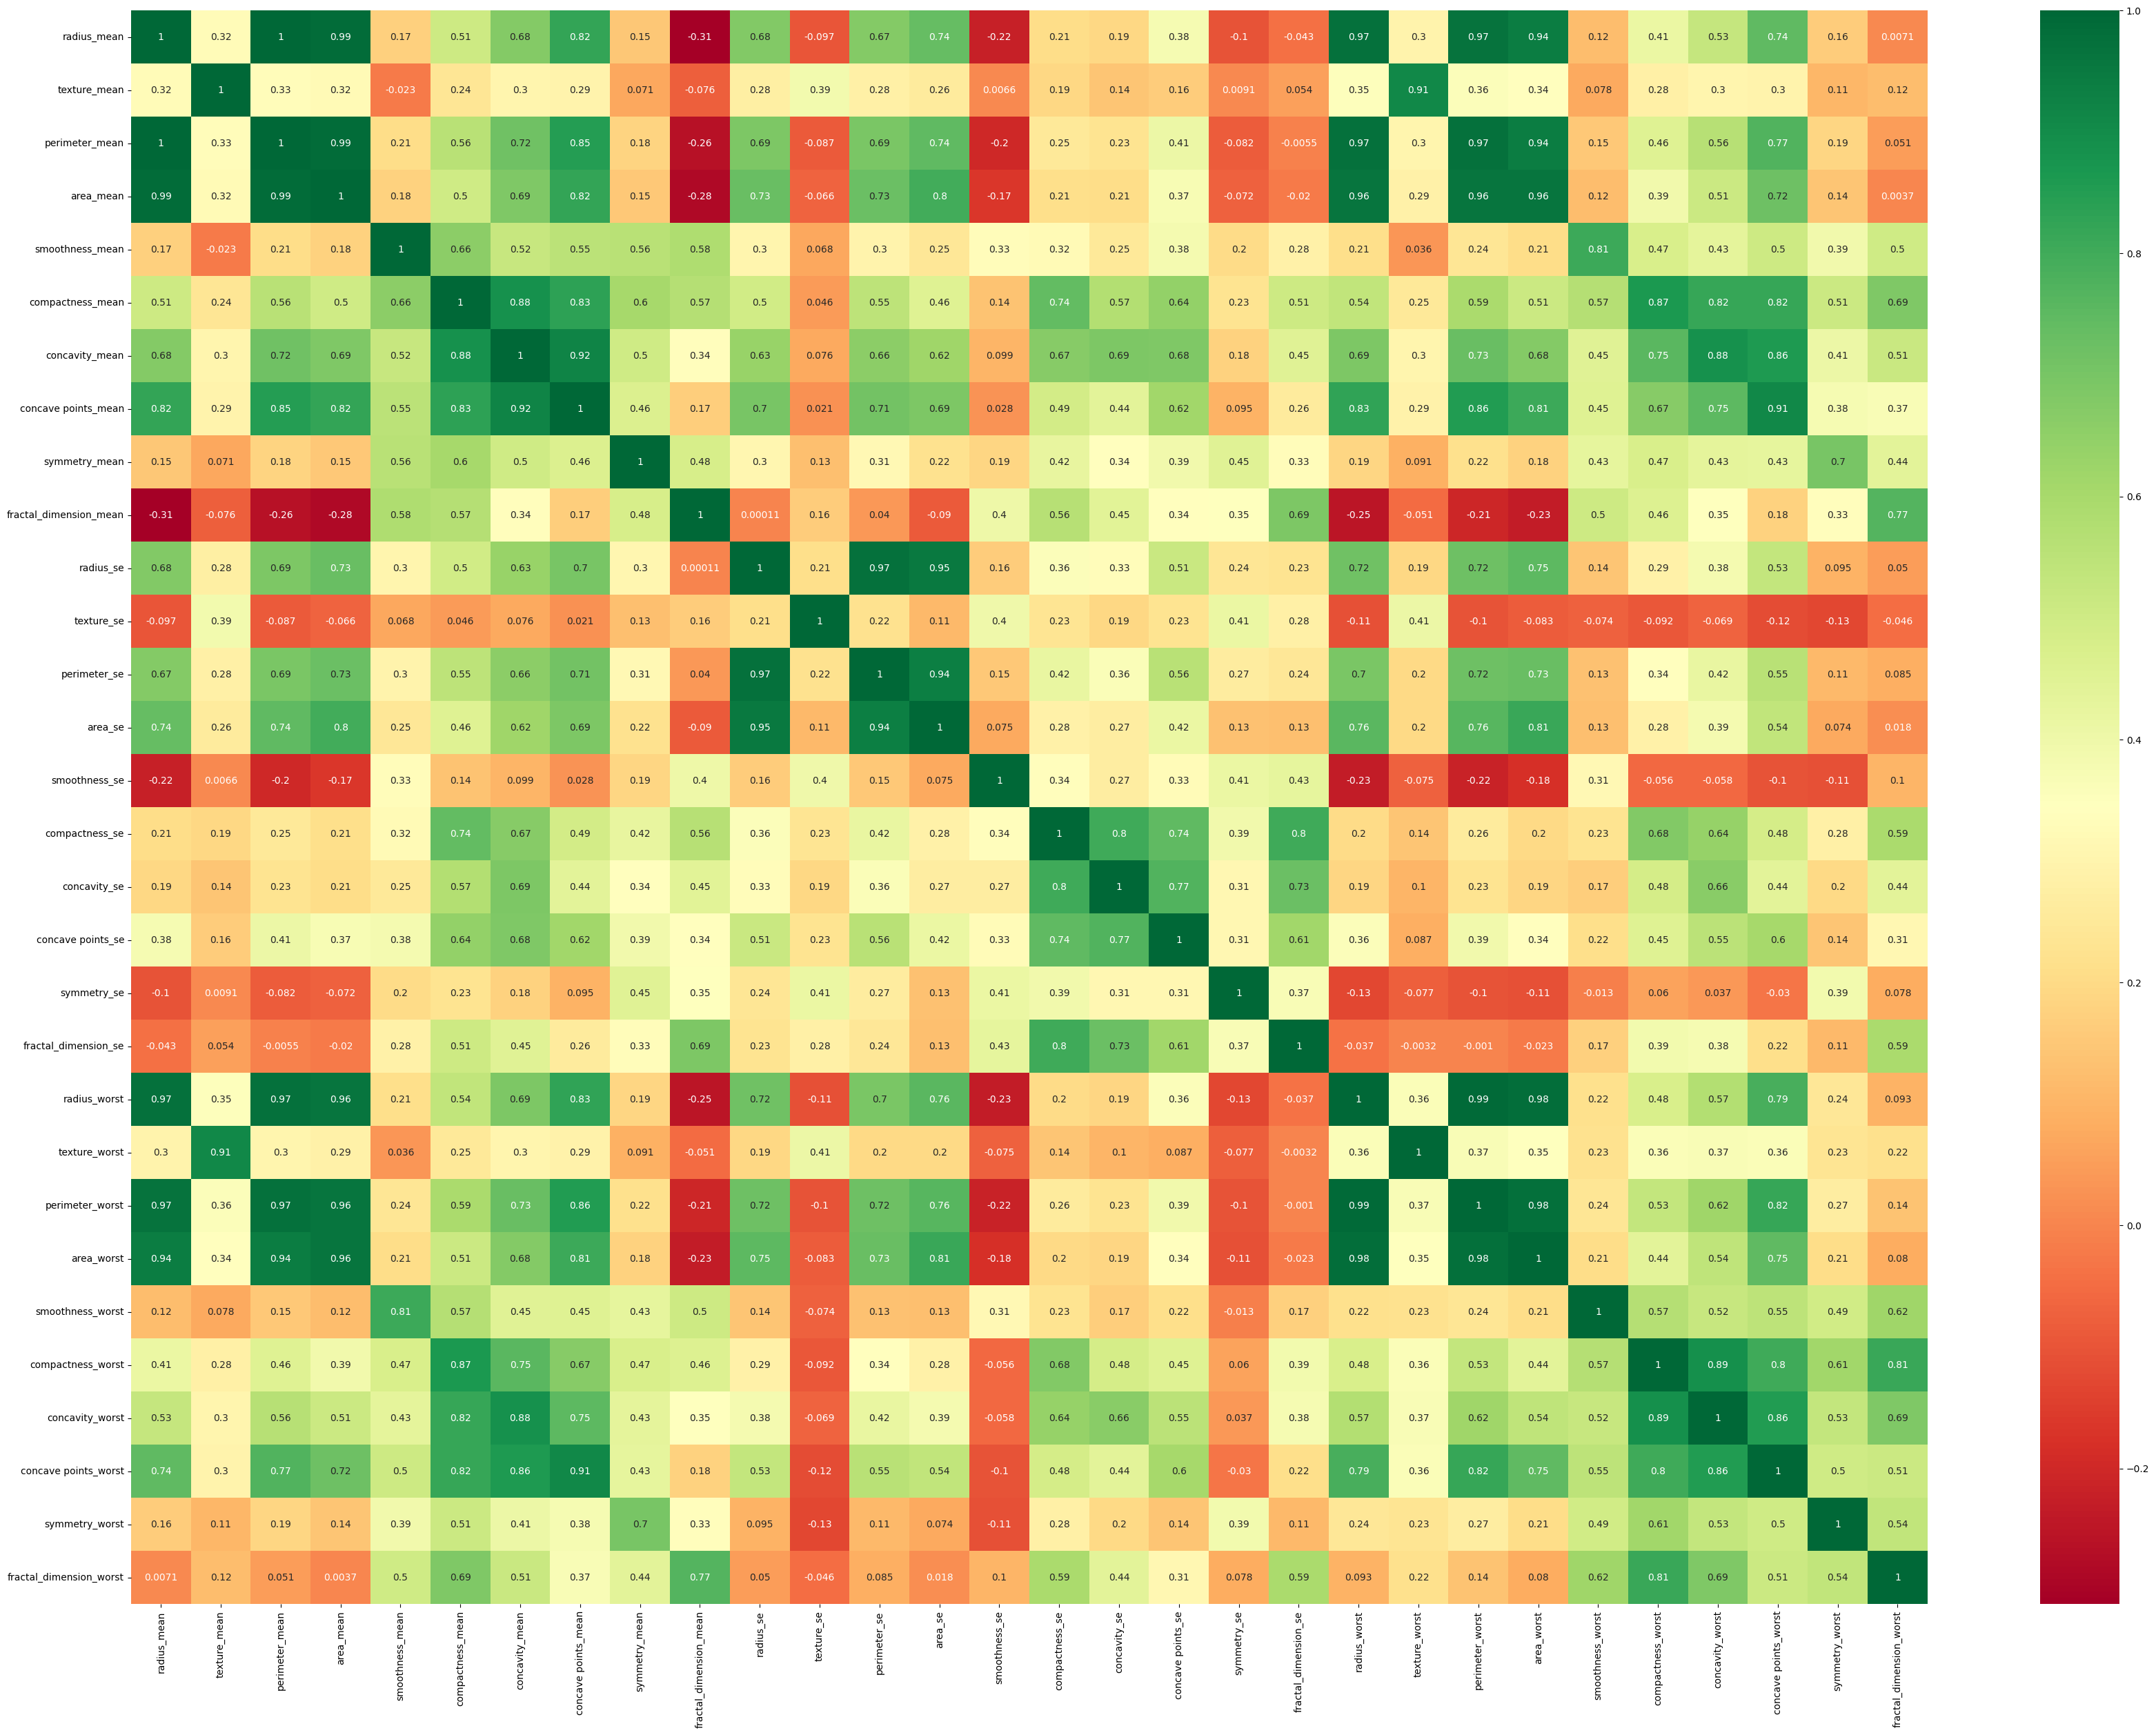

In [ ]:
plt.figure(figsize=(42, 30))  # Ajustar el tamaño de la figura
sns.heatmap(det_can.iloc[:, 1:31].corr(), annot=True, cmap='RdYlGn')
plt.show()